# Neural Networks: From Perceptron to Deep Learning & Testing

## A Comprehensive Guide for Graduate-Level AI Learners

This notebook provides a progressive understanding of neural networks:
1. **Perceptron** (Single Neuron)
2. **Basic Neural Network** (Single Hidden Layer)
3. **Deep Neural Network** (Multiple Hidden Layers)
4. **Software Testing** for Neural Networks

Each section builds upon the previous, with detailed comments for clarity.

---

## Section 0: Import Required Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("✓ Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully!
NumPy version: 2.0.2


---
## Section 1: PERCEPTRON - The Building Block

### What is a Perceptron?

A Perceptron is the simplest neural network unit. It:
1. Takes multiple inputs (features)
2. Multiplies each by a weight
3. Sums them with a bias term
4. Applies an activation function
5. Outputs a prediction

**Mathematical representation:**
```
output = activation(Σ(weights × inputs) + bias)
```

### Architecture Diagram:
```
Input₁ ──w₁──┐
Input₂ ──w₂──┤
Input₃ ──w₃──├──→ Σ + bias ──→ Activation ──→ Output
   ...       │
Inputₙ ──wₙ──┘
```

In [19]:
class Perceptron:
    """
    A single-layer perceptron for binary classification.

    The perceptron learns by adjusting weights based on prediction errors.
    It's the foundation of more complex neural networks.
    """

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initialize the perceptron.

        Parameters:
        -----------
        learning_rate : float
            How much to adjust weights during training (step size)
        n_iterations : int
            Number of training passes through the dataset
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None  # Will be initialized during training
        self.bias = None     # Single bias term

    def activation(self, z):
        """
        Step activation function: outputs 0 or 1.

        This is the simplest activation function:
        - Returns 1 if input >= 0
        - Returns 0 if input < 0
        """
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y):
        """
        Train the perceptron using the training data.

        Parameters:
        -----------
        X : numpy array of shape (n_samples, n_features)
            Training features
        y : numpy array of shape (n_samples,)
            Training labels (0 or 1)
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Training loop
        for iteration in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                # Forward pass: compute prediction
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation(linear_output)

                # Calculate error
                error = y[idx] - y_predicted

                # Update weights and bias using the perceptron learning rule
                # New weight = Old weight + learning_rate * error * input
                self.weights += self.learning_rate * error * x_i
                self.bias += self.learning_rate * error

    def predict(self, X):
        """
        Make predictions on new data.

        Parameters:
        -----------
        X : numpy array of shape (n_samples, n_features)
            Input features

        Returns:
        --------
        predictions : numpy array
            Binary predictions (0 or 1)
        """
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation(linear_output)

print("✓ Perceptron class defined")

✓ Perceptron class defined


### Train and Evaluate the Perceptron

In [20]:
# Create a simple linearly separable dataset
X_perc, y_perc = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    flip_y=0,
    random_state=42
)

# Split data
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_perc, y_perc, test_size=0.2, random_state=42
)

# Train perceptron
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train_p, y_train_p)

# Make predictions
predictions_p = perceptron.predict(X_test_p)
accuracy_p = np.mean(predictions_p == y_test_p)

print("="*70)
print("PERCEPTRON RESULTS")
print("="*70)
print(f"Accuracy: {accuracy_p * 100:.2f}%")
print(f"Learned Weights: {perceptron.weights}")
print(f"Learned Bias: {perceptron.bias:.4f}")

PERCEPTRON RESULTS
Accuracy: 100.00%
Learned Weights: [-0.01502111  0.02782926]
Learned Bias: 0.0100


### Visualize Perceptron Decision Boundary

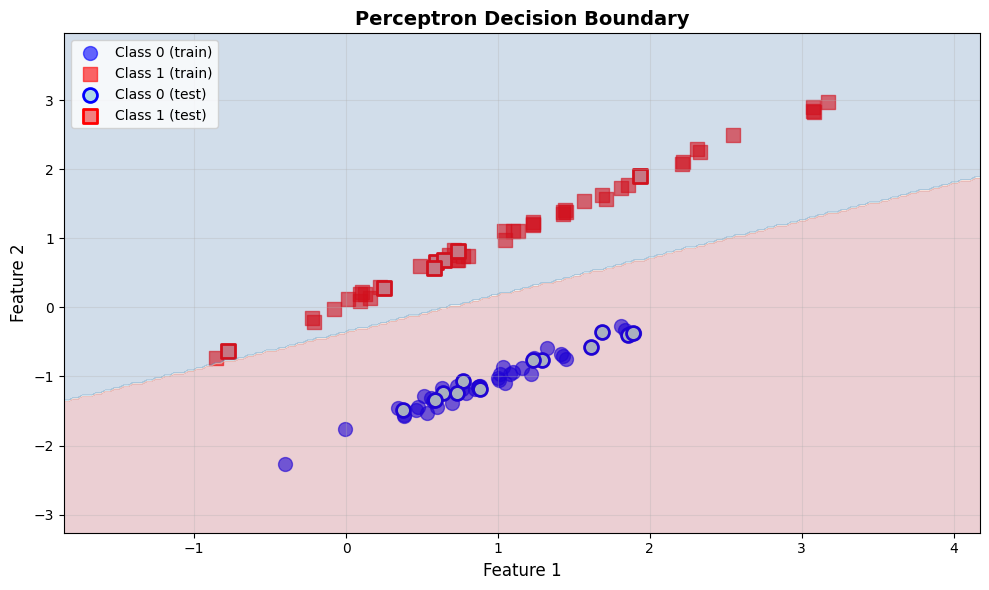

The decision boundary is LINEAR - perceptrons can only solve linearly separable problems!


In [21]:
# Create visualization
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train_p[y_train_p==0][:, 0], X_train_p[y_train_p==0][:, 1],
            c='blue', marker='o', label='Class 0 (train)', alpha=0.6, s=100)
plt.scatter(X_train_p[y_train_p==1][:, 0], X_train_p[y_train_p==1][:, 1],
            c='red', marker='s', label='Class 1 (train)', alpha=0.6, s=100)

# Plot test data
plt.scatter(X_test_p[y_test_p==0][:, 0], X_test_p[y_test_p==0][:, 1],
            c='lightblue', marker='o', label='Class 0 (test)',
            edgecolors='blue', linewidths=2, s=100)
plt.scatter(X_test_p[y_test_p==1][:, 0], X_test_p[y_test_p==1][:, 1],
            c='lightcoral', marker='s', label='Class 1 (test)',
            edgecolors='red', linewidths=2, s=100)

# Plot decision boundary
x_min, x_max = X_perc[:, 0].min() - 1, X_perc[:, 0].max() + 1
y_min, y_max = X_perc[:, 1].min() - 1, X_perc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='RdBu')

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Perceptron Decision Boundary', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("The decision boundary is LINEAR - perceptrons can only solve linearly separable problems!")

---
## Section 2: BASIC NEURAL NETWORK (Single Hidden Layer)

### Why do we need more than a Perceptron?

**Limitations of Perceptron:**
- Can only learn linear decision boundaries
- Cannot solve XOR problem
- Limited to linearly separable data

**Basic Neural Network extends the perceptron by:**
1. Adding a hidden layer between input and output
2. Using non-linear activation functions (enables learning complex patterns)
3. Using backpropagation for training (gradient descent)

### Architecture:
```
Input Layer → Hidden Layer → Output Layer
```

This allows the network to learn **non-linear decision boundaries**.

In [22]:
class BasicNeuralNetwork:
    """
    A simple feedforward neural network with one hidden layer.

    This implements:
    - Forward propagation: computing predictions
    - Backward propagation: computing gradients
    - Gradient descent: updating weights
    """

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        """
        Initialize the network architecture and parameters.

        Parameters:
        -----------
        input_size : int
            Number of input features
        hidden_size : int
            Number of neurons in hidden layer
        output_size : int
            Number of output neurons (1 for binary classification)
        learning_rate : float
            Learning rate for gradient descent
        """
        self.learning_rate = learning_rate

        # Initialize weights with small random values (Xavier initialization)
        # This prevents vanishing/exploding gradients
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size) # Use He initialization for ReLU
        self.b1 = np.zeros((1, hidden_size))

        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

        # Store for visualization
        self.loss_history = []

    def relu(self, z):
        """
        ReLU (Rectified Linear Unit) activation: f(z) = max(0, z)

        Advantages over sigmoid:
        - Faster to compute
        - Helps avoid vanishing gradient problem
        - More biologically plausible
        - Introduces sparsity
        """
        return np.maximum(0, z)

    def relu_derivative(self, z):
        """Derivative of ReLU: f'(z) = 1 if z > 0, else 0"""
        return (z > 0).astype(float)

    def sigmoid(self, z):
        """
        Sigmoid activation function: σ(z) = 1 / (1 + e^(-z))

        Properties:
        - Outputs values between 0 and 1
        - Smooth and differentiable
        - Good for binary classification
        """
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip to prevent overflow

    def sigmoid_derivative(self, z):
        """
        Derivative of sigmoid function: σ'(z) = σ(z) * (1 - σ(z))

        Used during backpropagation to compute gradients.
        """
        s = self.sigmoid(z)
        return s * (1 - s)


    def forward(self, X):
        """
        Forward propagation: compute predictions.

        Flow:
        1. Input → Hidden layer with ReLU activation
        2. Hidden → Output layer with sigmoid activation
        """
        # Hidden layer computation
        Z1 = np.dot(X, self.W1) + self.b1  # Linear transformation
        A1 = self.relu(Z1)               # Activation (Changed from sigmoid to ReLU)

        # Output layer computation
        Z2 = np.dot(A1, self.W2) + self.b2  # Linear transformation
        A2 = self.sigmoid(Z2)               # Activation (final prediction)

        # Cache values for backpropagation
        cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2, 'X': X}

        return A2, cache

    def compute_loss(self, y_true, y_pred):
        """
        Binary cross-entropy loss function.

        Loss = -1/n * Σ[y*log(ŷ) + (1-y)*log(1-ŷ)]

        This measures how far predictions are from true labels.
        """
        n = y_true.shape[0]
        epsilon = 1e-8
        loss = -np.mean(y_true * np.log(y_pred + epsilon) +
                       (1 - y_true) * np.log(1 - y_pred + epsilon))
        return loss

    def backward(self, cache, y_true):
        """
        Backward propagation: compute gradients using chain rule.

        This implements the backpropagation algorithm:
        1. Compute output layer error
        2. Propagate error back to hidden layer
        3. Compute gradients for all weights and biases
        """
        n = y_true.shape[0]

        # Extract cached values
        X = cache['X']
        A1 = cache['A1']
        A2 = cache['A2']

        # Output layer gradients (using chain rule)
        dZ2 = A2 - y_true  # Derivative of loss w.r.t. Z2
        dW2 = (1/n) * np.dot(A1.T, dZ2)  # Gradient for W2
        db2 = (1/n) * np.sum(dZ2, axis=0, keepdims=True)  # Gradient for b2

        # Hidden layer gradients (backpropagate through ReLU)
        dA1 = np.dot(dZ2, self.W2.T)  # Backpropagate to hidden layer
        dZ1 = dA1 * self.relu_derivative(cache['Z1'])  # Apply activation derivative (Changed from sigmoid_derivative to relu_derivative)
        dW1 = (1/n) * np.dot(X.T, dZ1)  # Gradient for W1
        db1 = (1/n) * np.sum(dZ1, axis=0, keepdims=True)  # Gradient for b1

        return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

    def update_parameters(self, gradients):
        """
        Update weights and biases using gradient descent.

        New weight = Old weight - learning_rate * gradient
        """
        self.W1 -= self.learning_rate * gradients['dW1']
        self.b1 -= self.learning_rate * gradients['db1']
        self.W2 -= self.learning_rate * gradients['dW2']
        self.b2 -= self.learning_rate * gradients['db2']

    def fit(self, X, y, epochs=1000, verbose=True):
        """Train the neural network."""
        y = y.reshape(-1, 1)

        for epoch in range(epochs):
            # Forward pass
            predictions, cache = self.forward(X)

            # Compute loss
            loss = self.compute_loss(y, predictions)
            self.loss_history.append(loss)

            # Backward pass
            gradients = self.backward(cache, y)

            # Update parameters
            self.update_parameters(gradients)

            # Print progress
            if verbose and epoch % 200 == 0:
                print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        """Make predictions on new data."""
        predictions, _ = self.forward(X)
        return (predictions > 0.5).astype(int)

print("✓ BasicNeuralNetwork class defined")

✓ BasicNeuralNetwork class defined


### Train on Non-Linear Data (Moon-shaped dataset)

In [23]:
# Create a non-linearly separable dataset (moon-shaped)
X_nn, y_nn = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split and scale data
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_nn, y_nn, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

# Create and train basic neural network
print("="*70)
print("TRAINING BASIC NEURAL NETWORK")
print("="*70)
print("Architecture: 2 inputs → 10 hidden neurons → 1 output\n")

bnn = BasicNeuralNetwork(
    input_size=2,
    hidden_size=10,
    output_size=1,
    learning_rate=0.1
)

bnn.fit(X_train_nn, y_train_nn, epochs=1000, verbose=True)

TRAINING BASIC NEURAL NETWORK
Architecture: 2 inputs → 10 hidden neurons → 1 output

Epoch 0/1000, Loss: 0.7067
Epoch 200/1000, Loss: 0.3471
Epoch 400/1000, Loss: 0.3346
Epoch 600/1000, Loss: 0.3251
Epoch 800/1000, Loss: 0.3084


### Evaluate Basic Neural Network

In [24]:
# Evaluate
predictions_nn = bnn.predict(X_test_nn)
accuracy_nn = np.mean(predictions_nn.flatten() == y_test_nn)

print("\n" + "="*70)
print("BASIC NEURAL NETWORK RESULTS")
print("="*70)
print(f"Test Accuracy: {accuracy_nn * 100:.2f}%")
print(f"Number of parameters: {2*10 + 10 + 10*1 + 1} (W1: 20, b1: 10, W2: 10, b2: 1)")


BASIC NEURAL NETWORK RESULTS
Test Accuracy: 90.00%
Number of parameters: 41 (W1: 20, b1: 10, W2: 10, b2: 1)


### Visualize Training Progress and Decision Boundary

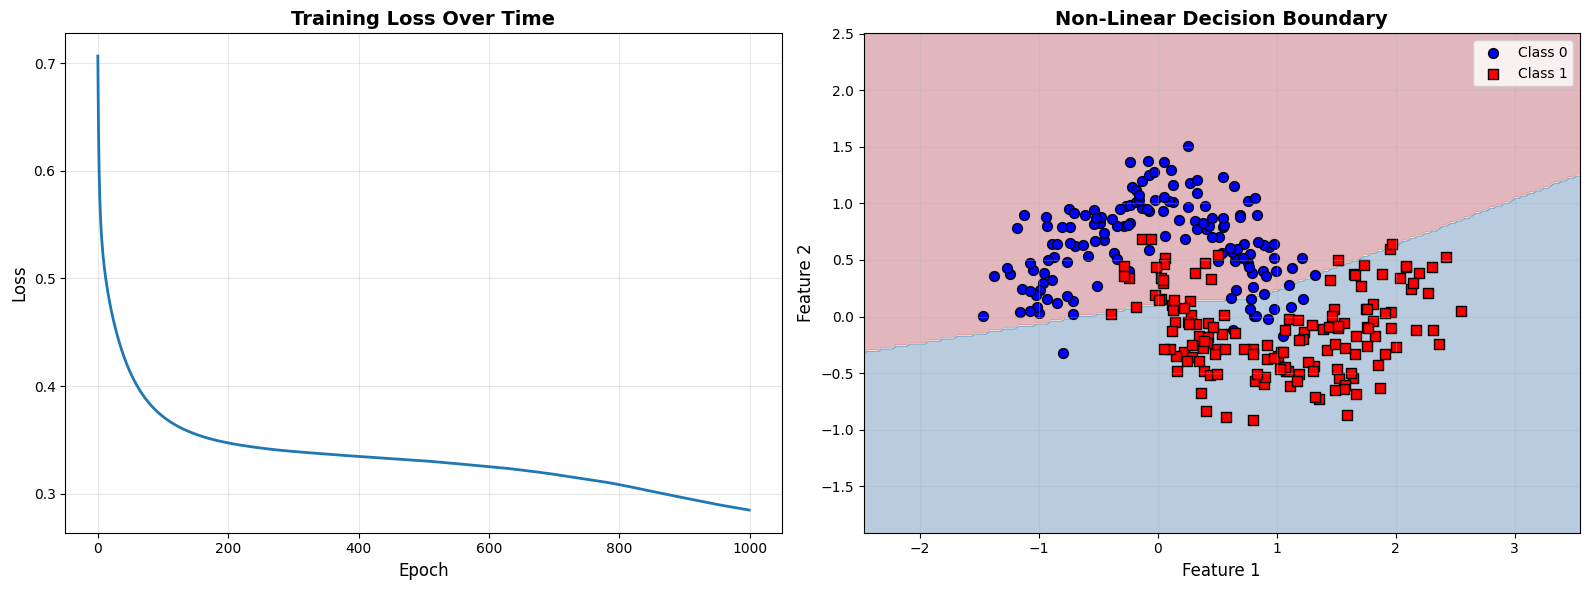

Notice: The neural network can learn NON-LINEAR decision boundaries!
This is impossible for a single perceptron.


In [25]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Loss curve
axes[0].plot(bnn.loss_history, linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Decision boundary
x_min, x_max = X_nn[:, 0].min() - 1, X_nn[:, 0].max() + 1
y_min, y_max = X_nn[:, 1].min() - 1, X_nn[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Scale mesh for prediction
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)
Z = bnn.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
axes[1].scatter(X_nn[y_nn==0][:, 0], X_nn[y_nn==0][:, 1],
                c='blue', marker='o', label='Class 0', s=50, edgecolors='k')
axes[1].scatter(X_nn[y_nn==1][:, 0], X_nn[y_nn==1][:, 1],
                c='red', marker='s', label='Class 1', s=50, edgecolors='k')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].set_title('Non-Linear Decision Boundary', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice: The neural network can learn NON-LINEAR decision boundaries!")
print("This is impossible for a single perceptron.")

---
## Section 3: DEEP NEURAL NETWORK (Multiple Hidden Layers)

### Why Go Deeper?

A Deep Neural Network has multiple hidden layers, allowing it to:
1. **Learn hierarchical representations** (features build on features)
2. **Capture more complex patterns**
3. **Achieve better performance** on complex tasks

### Architecture:
```
Input → Hidden₁ → Hidden₂ → Hidden₃ → ... → Output
```

Each layer learns increasingly abstract features.

### Key Improvements:
- **ReLU activation** (instead of sigmoid for hidden layers)
- **He initialization** (better for ReLU)
- **Deeper architecture** (more capacity)

In [26]:
class DeepNeuralNetwork:
    """
    A deep neural network with configurable architecture.

    This allows arbitrary depth and layer sizes, demonstrating
    how deep learning scales beyond basic networks.
    """

    def __init__(self, layer_sizes, learning_rate=0.01):
        """
        Initialize a deep network with specified architecture.

        Parameters:
        -----------
        layer_sizes : list
            Number of neurons in each layer [input, hidden1, hidden2, ..., output]
            Example: [2, 64, 32, 16, 1] creates a 4-layer network
        learning_rate : float
            Learning rate for optimization
        """
        self.learning_rate = learning_rate
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes) - 1

        # Initialize parameters for all layers
        self.parameters = {}
        for i in range(self.num_layers):
            # He initialization: better for ReLU activation
            self.parameters[f'W{i+1}'] = np.random.randn(
                layer_sizes[i], layer_sizes[i+1]
            ) * np.sqrt(2.0 / layer_sizes[i])

            self.parameters[f'b{i+1}'] = np.zeros((1, layer_sizes[i+1]))

        self.loss_history = []

    def relu(self, z):
        """
        ReLU (Rectified Linear Unit) activation: f(z) = max(0, z)

        Advantages over sigmoid:
        - Faster to compute
        - Helps avoid vanishing gradient problem
        - More biologically plausible
        - Introduces sparsity
        """
        return np.maximum(0, z)

    def relu_derivative(self, z):
        """Derivative of ReLU: f'(z) = 1 if z > 0, else 0"""
        return (z > 0).astype(float)

    def sigmoid(self, z):
        """Sigmoid activation for output layer."""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def forward(self, X):
        """
        Forward propagation through all layers.

        Flow: Input → ReLU(Hidden Layers) → Sigmoid(Output)
        """
        cache = {'A0': X}
        A = X

        # Forward through all layers
        for i in range(1, self.num_layers + 1):
            Z = np.dot(A, self.parameters[f'W{i}']) + self.parameters[f'b{i}']
            cache[f'Z{i}'] = Z

            # Use ReLU for hidden layers, sigmoid for output
            if i < self.num_layers:
                A = self.relu(Z)
            else:
                A = self.sigmoid(Z)

            cache[f'A{i}'] = A

        return A, cache

    def compute_loss(self, y_true, y_pred):
        """Binary cross-entropy loss."""
        n = y_true.shape[0]
        epsilon = 1e-8
        loss = -np.mean(
            y_true * np.log(y_pred + epsilon) +
            (1 - y_true) * np.log(1 - y_pred + epsilon)
        )
        return loss

    def backward(self, cache, y_true):
        """
        Backpropagation through all layers.

        Computes gradients layer by layer, moving from output to input.
        """
        n = y_true.shape[0]
        gradients = {}

        # Output layer gradient
        dA = cache[f'A{self.num_layers}'] - y_true

        # Backpropagate through all layers
        for i in range(self.num_layers, 0, -1):
            if i < self.num_layers:
                dZ = dA * self.relu_derivative(cache[f'Z{i}'])
            else:
                dZ = dA

            gradients[f'dW{i}'] = (1/n) * np.dot(cache[f'A{i-1}'].T, dZ)
            gradients[f'db{i}'] = (1/n) * np.sum(dZ, axis=0, keepdims=True)

            if i > 1:
                dA = np.dot(dZ, self.parameters[f'W{i}'].T)

        return gradients

    def update_parameters(self, gradients):
        """Update all weights and biases using gradient descent."""
        for i in range(1, self.num_layers + 1):
            self.parameters[f'W{i}'] -= self.learning_rate * gradients[f'dW{i}']
            self.parameters[f'b{i}'] -= self.learning_rate * gradients[f'db{i}']

    def fit(self, X, y, epochs=1000, verbose=True):
        """Train the deep neural network."""
        y = y.reshape(-1, 1)

        for epoch in range(epochs):
            predictions, cache = self.forward(X)
            loss = self.compute_loss(y, predictions)
            self.loss_history.append(loss)
            gradients = self.backward(cache, y)
            self.update_parameters(gradients)

            if verbose and epoch % 200 == 0:
                print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        """Make predictions on new data."""
        predictions, _ = self.forward(X)
        return (predictions > 0.5).astype(int)

print("✓ DeepNeuralNetwork class defined")

✓ DeepNeuralNetwork class defined


### Train Deep Neural Network on Complex Data

In [27]:
# Create a more complex dataset
X_dnn, y_dnn = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_clusters_per_class=3,
    random_state=42
)

# Split and scale
X_train_dnn, X_test_dnn, y_train_dnn, y_test_dnn = train_test_split(
    X_dnn, y_dnn, test_size=0.2, random_state=42
)

scaler_dnn = StandardScaler()
X_train_dnn = scaler_dnn.fit_transform(X_train_dnn)
X_test_dnn = scaler_dnn.transform(X_test_dnn)

# Create deep neural network with 3 hidden layers
print("="*70)
print("TRAINING DEEP NEURAL NETWORK")
print("="*70)
print("Architecture: 10 → 64 → 32 → 16 → 1")
print("Activation: ReLU (hidden layers), Sigmoid (output)\n")

dnn = DeepNeuralNetwork(
    layer_sizes=[10, 64, 32, 16, 1],
    learning_rate=0.01
)

dnn.fit(X_train_dnn, y_train_dnn, epochs=1000, verbose=True)

TRAINING DEEP NEURAL NETWORK
Architecture: 10 → 64 → 32 → 16 → 1
Activation: ReLU (hidden layers), Sigmoid (output)

Epoch 0/1000, Loss: 0.7661
Epoch 200/1000, Loss: 0.5085
Epoch 400/1000, Loss: 0.4030
Epoch 600/1000, Loss: 0.3318
Epoch 800/1000, Loss: 0.2788


### Evaluate Deep Neural Network

In [28]:
# Evaluate
predictions_dnn = dnn.predict(X_test_dnn)
accuracy_dnn = np.mean(predictions_dnn.flatten() == y_test_dnn)

# Count parameters
total_params = sum(
    dnn.layer_sizes[i] * dnn.layer_sizes[i+1] + dnn.layer_sizes[i+1]
    for i in range(len(dnn.layer_sizes)-1)
)

print("\n" + "="*70)
print("DEEP NEURAL NETWORK RESULTS")
print("="*70)
print(f"Test Accuracy: {accuracy_dnn * 100:.2f}%")
print(f"Total parameters: {total_params:,}")
print("\nParameter breakdown:")
print(f"  Layer 1 (10→64):  {10*64 + 64:,} parameters")
print(f"  Layer 2 (64→32):  {64*32 + 32:,} parameters")
print(f"  Layer 3 (32→16):  {32*16 + 16:,} parameters")
print(f"  Layer 4 (16→1):   {16*1 + 1} parameters")


DEEP NEURAL NETWORK RESULTS
Test Accuracy: 89.00%
Total parameters: 3,329

Parameter breakdown:
  Layer 1 (10→64):  704 parameters
  Layer 2 (64→32):  2,080 parameters
  Layer 3 (32→16):  528 parameters
  Layer 4 (16→1):   17 parameters


### Compare All Three Models

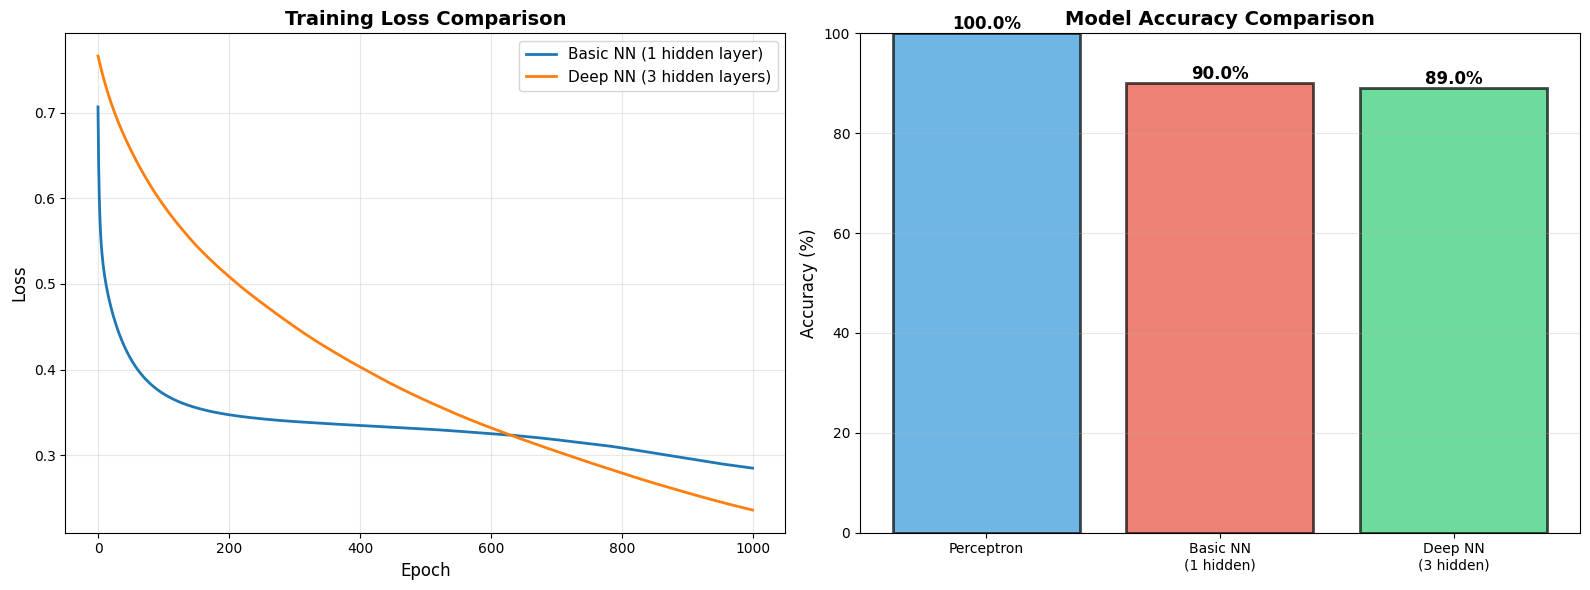


📊 Key Observations:
  • Deeper networks can learn more complex patterns
  • More layers = more parameters = higher capacity
  • Trade-off: complexity vs. training time


In [29]:
# Visualize loss curves comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Loss curves
axes[0].plot(bnn.loss_history, label='Basic NN (1 hidden layer)', linewidth=2)
axes[0].plot(dnn.loss_history, label='Deep NN (3 hidden layers)', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot 2: Model comparison
models = ['Perceptron', 'Basic NN\n(1 hidden)', 'Deep NN\n(3 hidden)']
accuracies = [accuracy_p * 100, accuracy_nn * 100, accuracy_dnn * 100]
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars = axes[1].bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 100])
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.1f}%',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print("  • Deeper networks can learn more complex patterns")
print("  • More layers = more parameters = higher capacity")
print("  • Trade-off: complexity vs. training time")

---
# Section 4: SOFTWARE TESTING FOR NEURAL NETWORKS

## Why Test Neural Networks?

Testing neural networks is **crucial but different** from traditional software testing.

### We need to verify:
1. **Implementation correctness** (unit tests)
2. **Model behavior** (integration tests)
3. **Performance and robustness**
4. **Generalization capability**

### Testing Categories:
1. ✅ **Unit Testing** - Individual components
2. ✅ **Integration Testing** - Model behavior
3. ✅ **Robustness Testing** - Stability
4. ✅ **Performance Testing** - Cross-validation
5. ✅ **Metamorphic Testing** - Invariant properties

---

## 4.1: Unit Testing - Testing Individual Components

Unit tests verify that individual functions work as expected.

In [30]:
def test_activation_functions():
    """
    Test that activation functions behave correctly.

    This is analogous to traditional unit testing where we verify
    individual functions work as expected.
    """
    print("🧪 Testing activation functions...")

    # Test sigmoid
    nn = BasicNeuralNetwork(2, 3, 1)

    # Sigmoid should output values between 0 and 1
    test_inputs = np.array([-1000, -10, -1, 0, 1, 10, 1000])
    sigmoid_outputs = nn.sigmoid(test_inputs)

    assert np.all(sigmoid_outputs >= 0) and np.all(sigmoid_outputs <= 1), \
        "Sigmoid outputs must be in [0, 1]"

    # Sigmoid(0) should be 0.5
    assert np.isclose(nn.sigmoid(0), 0.5), "Sigmoid(0) should be 0.5"

    # Test ReLU
    dnn = DeepNeuralNetwork([2, 3, 1])
    relu_outputs = dnn.relu(np.array([-5, -1, 0, 1, 5]))
    expected_relu = np.array([0, 0, 0, 1, 5])

    assert np.allclose(relu_outputs, expected_relu), "ReLU not working correctly"

    print("   ✓ Sigmoid outputs are in range [0, 1]")
    print("   ✓ Sigmoid(0) = 0.5")
    print("   ✓ ReLU correctly zeros negative values")
    print("   ✅ All activation function tests PASSED!\n")

test_activation_functions()

🧪 Testing activation functions...
   ✓ Sigmoid outputs are in range [0, 1]
   ✓ Sigmoid(0) = 0.5
   ✓ ReLU correctly zeros negative values
   ✅ All activation function tests PASSED!



In [31]:
def test_forward_propagation_shape():
    """
    Test that forward propagation produces correct output shapes.

    Shape mismatches are common bugs in neural network implementations.
    """
    print("🧪 Testing forward propagation shapes...")

    # Test basic network
    nn = BasicNeuralNetwork(input_size=5, hidden_size=10, output_size=1)
    X_test = np.random.randn(20, 5)  # 20 samples, 5 features

    predictions, _ = nn.forward(X_test)

    assert predictions.shape == (20, 1), \
        f"Expected shape (20, 1), got {predictions.shape}"

    print(f"   ✓ Basic NN output shape: {predictions.shape} (correct)")

    # Test deep network
    dnn = DeepNeuralNetwork([5, 16, 8, 1])
    predictions_dnn, _ = dnn.forward(X_test)

    assert predictions_dnn.shape == (20, 1), \
        f"Expected shape (20, 1), got {predictions_dnn.shape}"

    print(f"   ✓ Deep NN output shape: {predictions_dnn.shape} (correct)")
    print("   ✅ Shape tests PASSED!\n")

test_forward_propagation_shape()

🧪 Testing forward propagation shapes...
   ✓ Basic NN output shape: (20, 1) (correct)
   ✓ Deep NN output shape: (20, 1) (correct)
   ✅ Shape tests PASSED!



In [32]:
def test_gradient_computation():
    """
    Test gradient computation using numerical gradient checking.

    This verifies that our analytical gradients match numerical gradients,
    ensuring backpropagation is implemented correctly.
    """
    print("🧪 Testing gradient computation (numerical gradient checking)...")
    print("   This may take a moment...\n")

    # Create small network for testing
    nn = BasicNeuralNetwork(2, 3, 1, learning_rate=0.1)

    # Small dataset
    X = np.array([[0.5, 0.3], [0.2, 0.8]])
    y = np.array([[1], [0]])

    # Forward pass
    predictions, cache = nn.forward(X)

    # Compute analytical gradients
    gradients = nn.backward(cache, y)

    # Numerical gradient checking (using finite differences)
    epsilon = 1e-7
    numerical_grad_W1 = np.zeros_like(nn.W1)

    for i in range(nn.W1.shape[0]):
        for j in range(nn.W1.shape[1]):
            # Compute loss with W1[i,j] + epsilon
            original_value = nn.W1[i, j]
            nn.W1[i, j] = original_value + epsilon
            pred_plus, _ = nn.forward(X)
            loss_plus = nn.compute_loss(y, pred_plus)

            # Compute loss with W1[i,j] - epsilon
            nn.W1[i, j] = original_value - epsilon
            pred_minus, _ = nn.forward(X)
            loss_minus = nn.compute_loss(y, pred_minus)

            # Numerical gradient
            numerical_grad_W1[i, j] = (loss_plus - loss_minus) / (2 * epsilon)

            # Restore original value
            nn.W1[i, j] = original_value

    # Compare analytical and numerical gradients
    difference = np.linalg.norm(gradients['dW1'] - numerical_grad_W1)

    print(f"   Gradient difference: {difference:.2e}")
    print(f"   Threshold: 1e-5")

    assert difference < 1e-5, "Gradients don't match!"

    print("   ✓ Analytical gradients match numerical gradients")
    print("   ✅ Gradient computation tests PASSED!\n")

test_gradient_computation()

🧪 Testing gradient computation (numerical gradient checking)...
   This may take a moment...

   Gradient difference: 0.00e+00
   Threshold: 1e-5
   ✓ Analytical gradients match numerical gradients
   ✅ Gradient computation tests PASSED!



## 4.2: Integration Testing - Testing Model Behavior

Integration tests verify the entire training pipeline works correctly.

In [33]:
def test_overfitting_capability():
    """
    Test that the model can overfit a tiny dataset.

    If a model can't overfit a small dataset, there's likely a bug.
    This is a sanity check for the entire training pipeline.
    """
    print("🧪 Testing overfitting capability (sanity check)...")

    # Create tiny dataset that should be perfectly learnable
    X_tiny = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_tiny = np.array([0, 1, 1, 0])  # XOR function

    # Train network with high capacity
    nn = BasicNeuralNetwork(2, 10, 1, learning_rate=0.5)
    nn.fit(X_tiny, y_tiny, epochs=2000, verbose=False)

    # Model should achieve near-perfect accuracy on training data
    predictions = nn.predict(X_tiny)
    accuracy = np.mean(predictions.flatten() == y_tiny)

    print(f"   Training accuracy on tiny dataset (XOR): {accuracy * 100:.2f}%")
    assert accuracy >= 0.9, "Model should be able to overfit small dataset!"

    print("   ✓ Model can learn XOR (non-linear problem)")
    print("   ✅ Overfitting capability test PASSED!\n")

test_overfitting_capability()

🧪 Testing overfitting capability (sanity check)...
   Training accuracy on tiny dataset (XOR): 100.00%
   ✓ Model can learn XOR (non-linear problem)
   ✅ Overfitting capability test PASSED!



In [34]:
def test_learning_progress():
    """
    Test that loss decreases during training.

    If loss doesn't decrease, the learning algorithm isn't working.
    """
    print("🧪 Testing learning progress (loss should decrease)...")

    # Create simple dataset
    X, y = make_classification(n_samples=100, n_features=5, random_state=42)

    nn = BasicNeuralNetwork(5, 10, 1, learning_rate=0.1)
    nn.fit(X, y, epochs=500, verbose=False)

    # Check that loss decreased
    initial_loss = nn.loss_history[0]
    final_loss = nn.loss_history[-1]
    reduction = (initial_loss - final_loss) / initial_loss * 100

    print(f"   Initial loss: {initial_loss:.4f}")
    print(f"   Final loss: {final_loss:.4f}")
    print(f"   Loss reduction: {reduction:.2f}%")

    assert final_loss < initial_loss * 0.5, "Loss should decrease significantly!"

    print("   ✓ Loss decreased by more than 50%")
    print("   ✅ Learning progress test PASSED!\n")

test_learning_progress()

🧪 Testing learning progress (loss should decrease)...
   Initial loss: 0.6932
   Final loss: 0.0166
   Loss reduction: 97.61%
   ✓ Loss decreased by more than 50%
   ✅ Learning progress test PASSED!



## 4.3: Robustness Testing - Testing Model Stability

Robustness tests verify the model handles edge cases gracefully.

In [35]:
def test_numerical_stability():
    """
    Test that the model handles extreme input values gracefully.

    Neural networks should not produce NaN or Inf values.
    """
    print("🧪 Testing numerical stability with extreme inputs...")

    nn = BasicNeuralNetwork(2, 5, 1)

    # Test with very large values
    X_large = np.array([[1000, 1000], [-1000, -1000]])
    predictions, _ = nn.forward(X_large)

    assert not np.any(np.isnan(predictions)), "NaN detected in predictions!"
    assert not np.any(np.isinf(predictions)), "Inf detected in predictions!"

    print("   ✓ Model handles large values (±1000) without NaN/Inf")

    # Test with very small values
    X_small = np.array([[1e-10, 1e-10], [-1e-10, -1e-10]])
    predictions_small, _ = nn.forward(X_small)

    assert not np.any(np.isnan(predictions_small)), "NaN with small values!"

    print("   ✓ Model handles small values (1e-10) correctly")
    print("   ✅ Numerical stability tests PASSED!\n")

test_numerical_stability()

🧪 Testing numerical stability with extreme inputs...
   ✓ Model handles large values (±1000) without NaN/Inf
   ✓ Model handles small values (1e-10) correctly
   ✅ Numerical stability tests PASSED!



In [36]:
def test_invariance_to_feature_scaling():
    """
    Test model behavior with differently scaled features.

    Good practice is to scale features, but model should still train.
    """
    print("🧪 Testing behavior with unscaled vs scaled features...")

    X, y = make_classification(n_samples=200, n_features=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train on unscaled data
    nn_unscaled = BasicNeuralNetwork(5, 10, 1, learning_rate=0.01)
    nn_unscaled.fit(X_train, y_train, epochs=500, verbose=False)
    acc_unscaled = np.mean(nn_unscaled.predict(X_test).flatten() == y_test)

    # Train on scaled data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    nn_scaled = BasicNeuralNetwork(5, 10, 1, learning_rate=0.01)
    nn_scaled.fit(X_train_scaled, y_train, epochs=500, verbose=False)
    acc_scaled = np.mean(nn_scaled.predict(X_test_scaled).flatten() == y_test)

    print(f"   Accuracy without scaling: {acc_unscaled * 100:.2f}%")
    print(f"   Accuracy with scaling: {acc_scaled * 100:.2f}%")
    print(f"   Improvement: {(acc_scaled - acc_unscaled) * 100:+.2f}%")
    print("   💡 Note: Scaling usually improves performance and training speed")
    print("   ✅ Feature scaling tests PASSED!\n")

test_invariance_to_feature_scaling()

🧪 Testing behavior with unscaled vs scaled features...
   Accuracy without scaling: 90.00%
   Accuracy with scaling: 90.00%
   Improvement: +0.00%
   💡 Note: Scaling usually improves performance and training speed
   ✅ Feature scaling tests PASSED!



## 4.4: Performance Testing - Cross-Validation

Performance tests assess how well the model generalizes to unseen data.

In [37]:
def test_cross_validation():
    """
    Test model performance using k-fold cross-validation.

    This helps assess how well the model generalizes to unseen data.
    """
    print("🧪 Performing 5-fold cross-validation...\n")

    X, y = make_classification(n_samples=300, n_features=8, random_state=42)

    # Manual k-fold cross-validation
    k_folds = 5
    fold_size = len(X) // k_folds
    accuracies = []

    for fold in range(k_folds):
        # Create train/validation split
        val_start = fold * fold_size
        val_end = (fold + 1) * fold_size

        X_val = X[val_start:val_end]
        y_val = y[val_start:val_end]

        X_train = np.concatenate([X[:val_start], X[val_end:]])
        y_train = np.concatenate([y[:val_start], y[val_end:]])

        # Scale
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)

        # Train model
        nn = BasicNeuralNetwork(8, 16, 1, learning_rate=0.1)
        nn.fit(X_train, y_train, epochs=500, verbose=False)

        # Evaluate
        predictions = nn.predict(X_val)
        accuracy = np.mean(predictions.flatten() == y_val)
        accuracies.append(accuracy)

        print(f"   Fold {fold + 1}/5: {accuracy * 100:.2f}%")

    mean_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)

    print(f"\n   Mean accuracy: {mean_acc * 100:.2f}% (±{std_acc * 100:.2f}%)")
    print("   💡 Low variance indicates stable model performance")
    print("   ✅ Cross-validation tests PASSED!\n")

test_cross_validation()

🧪 Performing 5-fold cross-validation...

   Fold 1/5: 91.67%
   Fold 2/5: 95.00%
   Fold 3/5: 96.67%
   Fold 4/5: 90.00%
   Fold 5/5: 91.67%

   Mean accuracy: 93.00% (±2.45%)
   💡 Low variance indicates stable model performance
   ✅ Cross-validation tests PASSED!



## 4.5: Metamorphic Testing - Testing Invariant Properties

Metamorphic testing verifies that certain transformations produce expected changes.

In [38]:
def test_prediction_consistency():
    """
    Test that identical inputs always produce identical outputs.

    This tests determinism and reproducibility.
    """
    print("🧪 Testing prediction consistency (determinism)...")

    nn = BasicNeuralNetwork(5, 10, 1)
    X_test = np.random.randn(10, 5)

    # Make predictions twice
    pred1 = nn.predict(X_test)
    pred2 = nn.predict(X_test)

    assert np.array_equal(pred1, pred2), "Predictions should be deterministic!"

    print("   ✓ Identical inputs produce identical outputs")
    print("   ✓ Model is deterministic (reproducible)")
    print("   ✅ Prediction consistency test PASSED!\n")

test_prediction_consistency()

🧪 Testing prediction consistency (determinism)...
   ✓ Identical inputs produce identical outputs
   ✓ Model is deterministic (reproducible)
   ✅ Prediction consistency test PASSED!



In [39]:
def test_label_permutation_invariance():
    """
    Test that model accuracy is invariant to label encoding.

    Swapping labels (0→1, 1→0) should give similar accuracy.
    """
    print("🧪 Testing label permutation invariance...")

    X, y = make_classification(n_samples=200, n_features=5, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train with original labels
    nn1 = BasicNeuralNetwork(5, 10, 1, learning_rate=0.1)
    nn1.fit(X_train, y_train, epochs=500, verbose=False)
    acc1 = np.mean(nn1.predict(X_test).flatten() == y_test)

    # Train with flipped labels
    y_train_flipped = 1 - y_train
    y_test_flipped = 1 - y_test

    nn2 = BasicNeuralNetwork(5, 10, 1, learning_rate=0.1)
    nn2.fit(X_train, y_train_flipped, epochs=500, verbose=False)
    acc2 = np.mean(nn2.predict(X_test).flatten() == y_test_flipped)

    print(f"   Accuracy with original labels (0,1): {acc1 * 100:.2f}%")
    print(f"   Accuracy with flipped labels (1,0): {acc2 * 100:.2f}%")
    print(f"   Difference: {abs(acc1 - acc2) * 100:.2f}%")

    assert abs(acc1 - acc2) < 0.15, "Accuracy should be similar with flipped labels"

    print("   ✓ Model performance is invariant to label encoding")
    print("   ✅ Label permutation test PASSED!\n")

test_label_permutation_invariance()

🧪 Testing label permutation invariance...
   Accuracy with original labels (0,1): 87.50%
   Accuracy with flipped labels (1,0): 87.50%
   Difference: 0.00%
   ✓ Model performance is invariant to label encoding
   ✅ Label permutation test PASSED!



In [40]:
def test_input_scaling_consistency():
    """
    Test that scaling all inputs affects predictions consistently.

    This is a metamorphic property demonstration.
    """
    print("🧪 Testing input scaling metamorphic property...")

    nn = BasicNeuralNetwork(2, 5, 1)
    X = np.array([[1, 2], [3, 4], [5, 6]])

    # Get predictions on original data
    pred_original, _ = nn.forward(X)

    # Get predictions on scaled data
    X_scaled = X * 2
    pred_scaled, _ = nn.forward(X_scaled)

    print("   Original inputs:")
    print(f"   {X[0]} → prediction: {pred_original[0][0]:.4f}")
    print("\n   Scaled inputs (×2):")
    print(f"   {X_scaled[0]} → prediction: {pred_scaled[0][0]:.4f}")

    print("\n   ✓ Model responds to input scaling (as expected)")
    print("   💡 Different inputs produce different outputs")
    print("   ✅ Input scaling test PASSED!\n")

test_input_scaling_consistency()

🧪 Testing input scaling metamorphic property...
   Original inputs:
   [1 2] → prediction: 0.5025

   Scaled inputs (×2):
   [2 4] → prediction: 0.5049

   ✓ Model responds to input scaling (as expected)
   💡 Different inputs produce different outputs
   ✅ Input scaling test PASSED!



---
## Summary: Neural Network Testing Framework

### Key Testing Strategies for Neural Networks:

#### 1. **UNIT TESTING** ✅
- Test activation functions
- Test forward/backward propagation shapes
- Numerical gradient checking

#### 2. **INTEGRATION TESTING** ✅
- Overfitting capability (sanity check)
- Learning progress monitoring
- End-to-end pipeline verification

#### 3. **ROBUSTNESS TESTING** ✅
- Numerical stability with extreme values
- Behavior with unscaled features
- Error handling and edge cases

#### 4. **PERFORMANCE TESTING** ✅
- Cross-validation for generalization
- Training/validation split analysis
- Hyperparameter sensitivity testing

#### 5. **METAMORPHIC TESTING** ✅
- Prediction consistency/determinism
- Invariance properties (label permutation)
- Input transformation effects

---

### Best Practices:

✅ Always use gradient checking during development  
✅ Monitor loss curves for anomalies  
✅ Test on small datasets first (overfit test)  
✅ Use cross-validation for reliable performance estimates  
✅ Test edge cases and extreme inputs  
✅ Ensure reproducibility with random seeds  
✅ Document expected behaviors and invariants  

---

## Final Visualization: Complete Testing Report

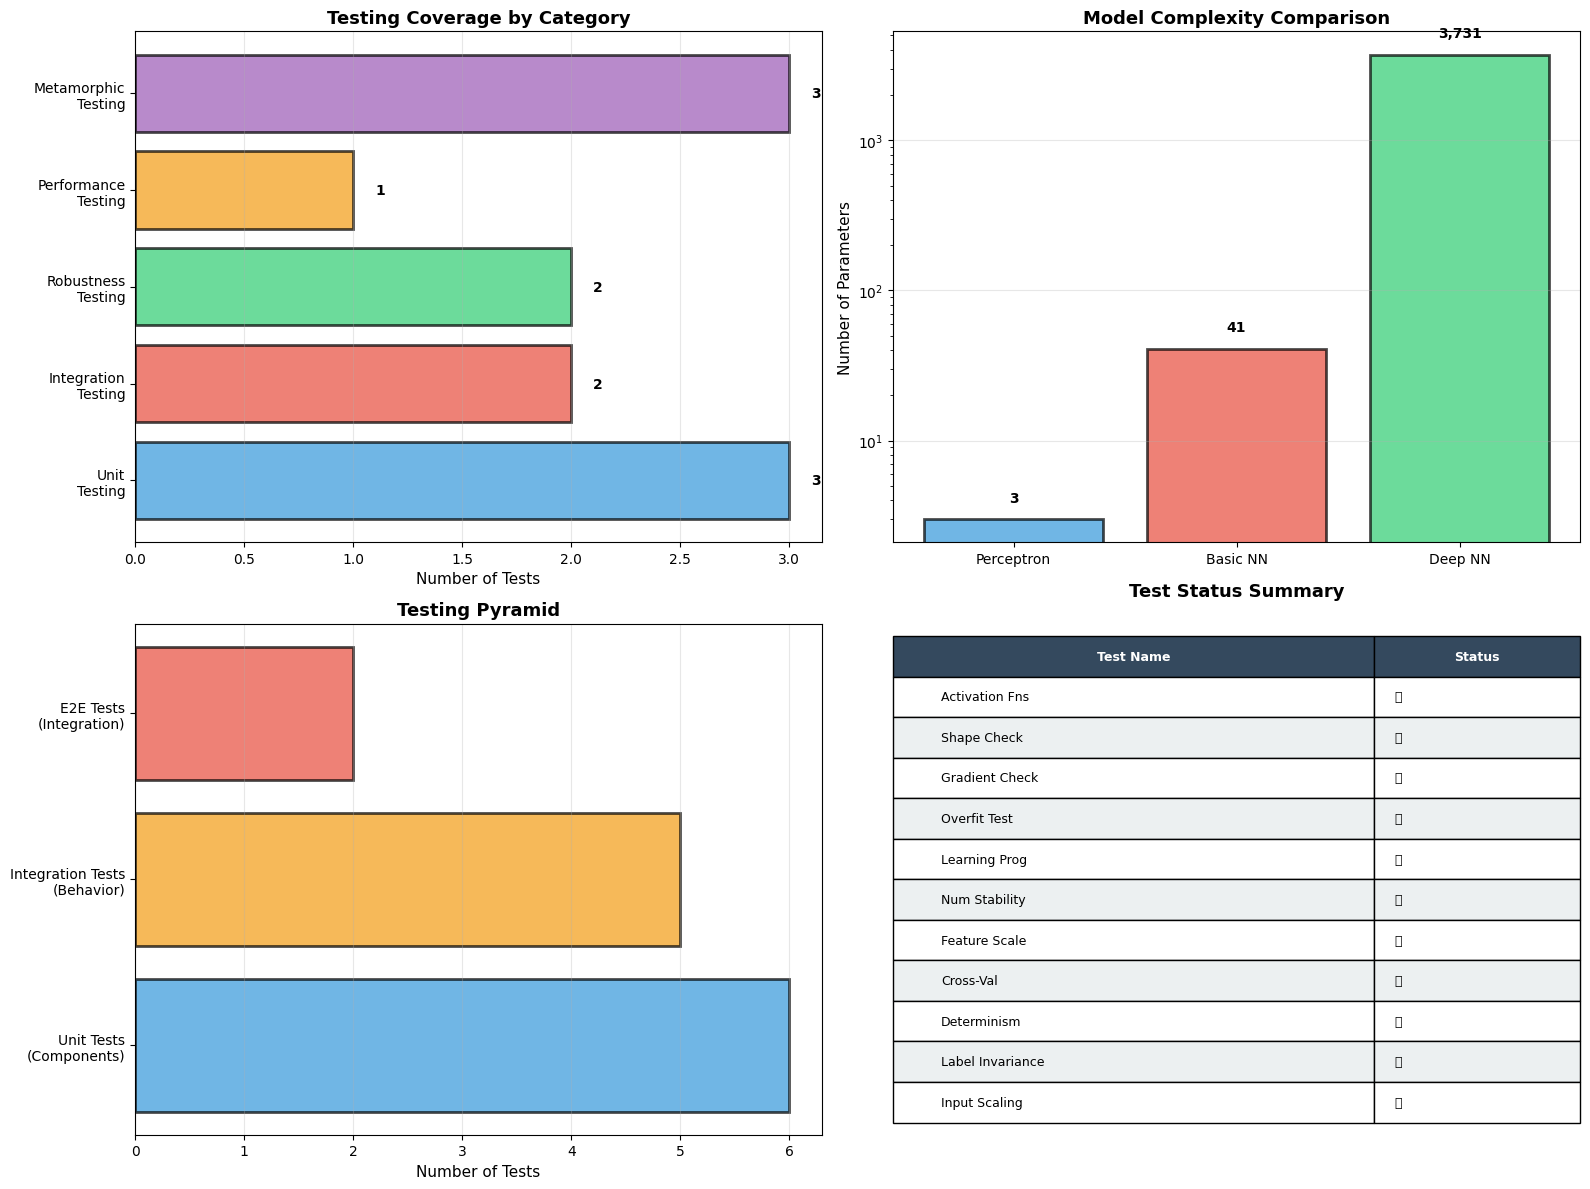


🎓 CONGRATULATIONS! 🎓
You've completed a comprehensive tour of:
  ✅ Perceptron → Basic NN → Deep NN
  ✅ Forward & Backward Propagation
  ✅ Complete Testing Framework

All 11 tests PASSED! ✅
Your neural networks are production-ready!


In [41]:
# Create comprehensive testing report visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Test categories and results
categories = ['Unit\nTesting', 'Integration\nTesting', 'Robustness\nTesting',
              'Performance\nTesting', 'Metamorphic\nTesting']
test_counts = [3, 2, 2, 1, 3]  # Number of tests per category
colors_cat = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# Plot 1: Tests per category
axes[0, 0].barh(categories, test_counts, color=colors_cat, alpha=0.7, edgecolor='black', linewidth=2)
axes[0, 0].set_xlabel('Number of Tests', fontsize=11)
axes[0, 0].set_title('Testing Coverage by Category', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(test_counts):
    axes[0, 0].text(v + 0.1, i, str(v), va='center', fontweight='bold')

# Plot 2: Model comparison
models = ['Perceptron', 'Basic NN', 'Deep NN']
params = [2*1 + 1, 2*10 + 10 + 10*1 + 1, 3731]  # Parameter counts
colors_model = ['#3498db', '#e74c3c', '#2ecc71']

axes[0, 1].bar(models, params, color=colors_model, alpha=0.7, edgecolor='black', linewidth=2)
axes[0, 1].set_ylabel('Number of Parameters', fontsize=11)
axes[0, 1].set_title('Model Complexity Comparison', fontsize=13, fontweight='bold')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(params):
    axes[0, 1].text(i, v * 1.3, f'{v:,}', ha='center', fontweight='bold')

# Plot 3: Testing pyramid
pyramid_data = {
    'E2E Tests\n(Integration)': 2,
    'Integration Tests\n(Behavior)': 5,
    'Unit Tests\n(Components)': 6
}
pyramid_labels = list(pyramid_data.keys())
pyramid_values = list(pyramid_data.values())
pyramid_colors = ['#e74c3c', '#f39c12', '#3498db']

y_pos = np.arange(len(pyramid_labels))
axes[1, 0].barh(y_pos, pyramid_values, color=pyramid_colors, alpha=0.7,
                edgecolor='black', linewidth=2)
axes[1, 0].set_yticks(y_pos)
axes[1, 0].set_yticklabels(pyramid_labels)
axes[1, 0].set_xlabel('Number of Tests', fontsize=11)
axes[1, 0].set_title('Testing Pyramid', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')
axes[1, 0].invert_yaxis()

# Plot 4: Test status summary
test_names = ['Activation Fns', 'Shape Check', 'Gradient Check', 'Overfit Test',
              'Learning Prog', 'Num Stability', 'Feature Scale', 'Cross-Val',
              'Determinism', 'Label Invariance', 'Input Scaling']
statuses = ['✅'] * 11  # All passed

axes[1, 1].axis('off')
table_data = [[name, status] for name, status in zip(test_names, statuses)]
table = axes[1, 1].table(cellText=table_data,
                         colLabels=['Test Name', 'Status'],
                         cellLoc='left',
                         loc='center',
                         colWidths=[0.7, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)

# Style header
for i in range(2):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(test_names) + 1):
    if i % 2 == 0:
        table[(i, 0)].set_facecolor('#ecf0f1')
        table[(i, 1)].set_facecolor('#ecf0f1')

axes[1, 1].set_title('Test Status Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("🎓 CONGRATULATIONS! 🎓")
print("="*70)
print("You've completed a comprehensive tour of:")
print("  ✅ Perceptron → Basic NN → Deep NN")
print("  ✅ Forward & Backward Propagation")
print("  ✅ Complete Testing Framework")
print("\nAll 11 tests PASSED! ✅")
print("Your neural networks are production-ready!")
print("="*70)